# Exercise 2: Newton's and Steffensen's fractals - Mathieu Rundstrom
Note: an edit was made to the code. It's outlined in a comment.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.misc
from PIL import Image

The following piece of code defines the iteration map 

$$\phi(z)=z-\frac{z^3-1}{3z^2}$$

of the Newton-Raphson method for the equation $z^3-1=0$. In addition, the three roots are specified, and a color for each of the roots is chosen.

In [2]:
#Newton-Raphson iteration for z**3-1=0
def phi(z):
    z=complex(z)
    return z+(1/(z*z)-z)/3
#cubic roots of 1
zz=[1,complex(-.5,.5*np.sqrt(3)),complex(-.5,-.5*np.sqrt(3))]
#corresponding colors
cc=[[1,0,0],[0,1,.5],[0,0,1]]

We consider the rectangle $(x_{\textrm{min}},x_{\textrm{max}})\times(y_{\textrm{min}},y_{\textrm{max}})$ in the $z$-plane, and superimpose on it a grid of size $\texttt{imgx}\times\texttt{imgy}$. From each grid point, we start the Newton-Raphson iteration, and depending on the root it converges to, we color the point. Convergence is deemed to occur if the cuurent iterand is within $\varepsilon$ distance of a root. In case the iteration takes too long (i.e., $\texttt{iteration number} > \texttt{maxit}$), or division by zero occurs, we leave the point uncolored (black). We also shade the colors in such a way that darker regions correspond to points that need more iterations to converge to a root.

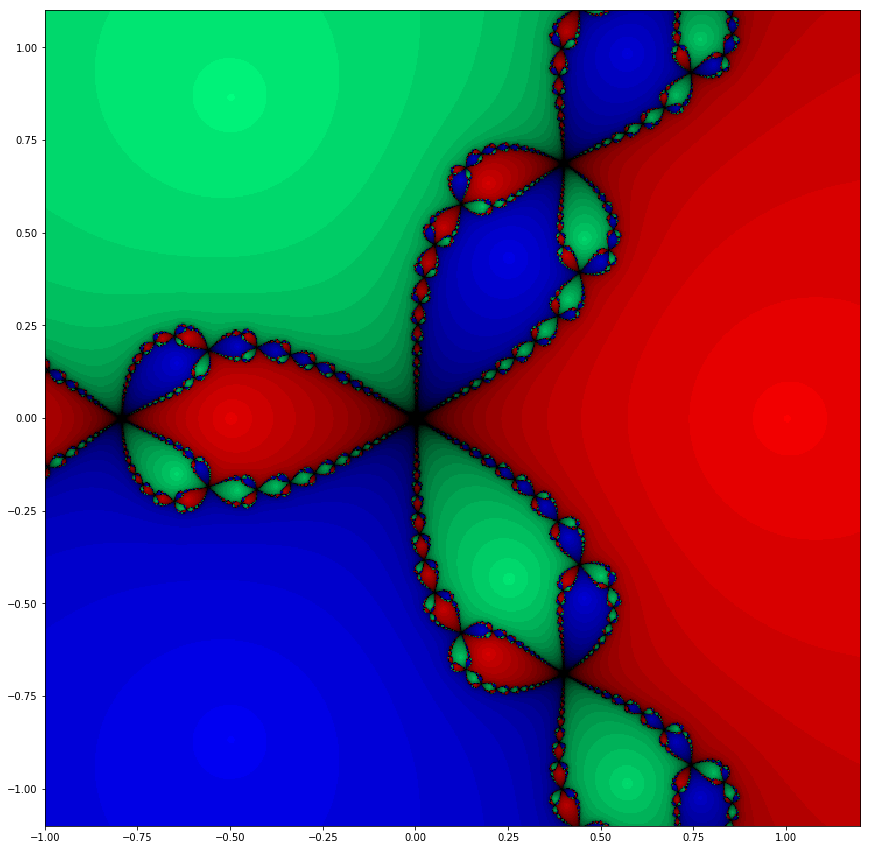

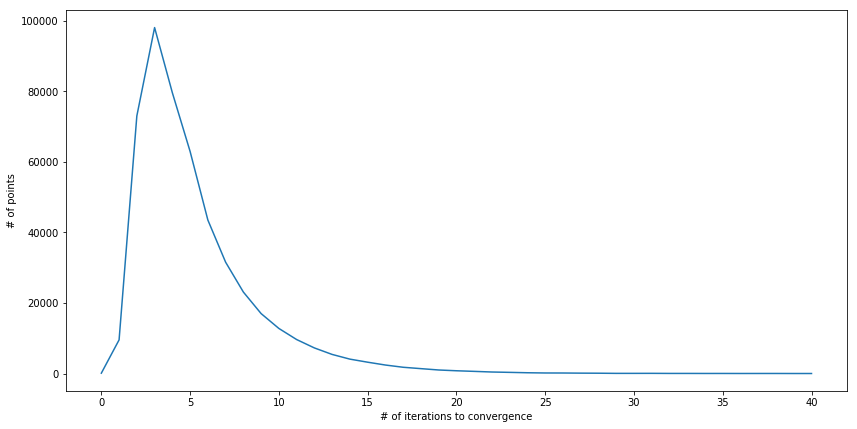

In [5]:
xmin = -1.
xmax = 1.2
ymin = -1.1
ymax = 1.1
eps = .0001
maxit = 40
imgx = 700
imgy = 700
img = np.zeros((imgy,imgx,3))
a = (xmax-xmin)/imgx
b = (ymax-ymin)/imgy
h = np.zeros(maxit+1)
sit=20
f = 1./sit
for i in range(imgy):
    for j in range(imgx):
        x=xmin+a*j
        y=ymax-b*i
        z0=complex(x,y)
        for k in range(maxit):
            if abs(z0)<eps:
                h[maxit]+=1
                break
            z=phi(z0)
            con=False
            for l in range(len(zz)):
                if abs(z-zz[l])<eps:
                    con=True
                    break
            if(con):
                #EDIT: To only have values in [0,1], we use numpy's clip function. (inspired by Samuel Hatin)
                img[i,j]=np.clip([(sit-k)*f*c for c in cc[l]], 0, 1)
                h[k]+=1
                break
            z0=z
        if k==maxit: h[maxit]+=1
plt.figure(figsize=(15,15))
plt.imshow(img,extent=[xmin,xmax,ymin,ymax])
plt.show()
scipy.misc.imsave('newt.png', img)
plt.figure(figsize=(14,7))
plt.plot(range(maxit+1),h)
plt.xlabel('# of iterations to convergence')
plt.ylabel('# of points')
plt.show()

# Problem 1. Reason behind monochromatic region
As seen in class, the NR method has guaranteed quadratic convergence near the roots, which is represented by the uniform coloring. In other words, near a certain root $r$, all points sufficiently close to $r$ will converge to $r$.

# Problem 2. Zooming in
We zoom in on $[0.3, 0.55]\times [-0.5, -0.25]$. The fractal nature of the boundary stems from the fact that points near the boundary are far from the root(s), and points around the boundary converge to difference roots. A small perturbation in the point can mean it converges to a different root. This can furthermore be understood since there are black regions between regions of color. Theese black regions symbolize points that take long to converge. 


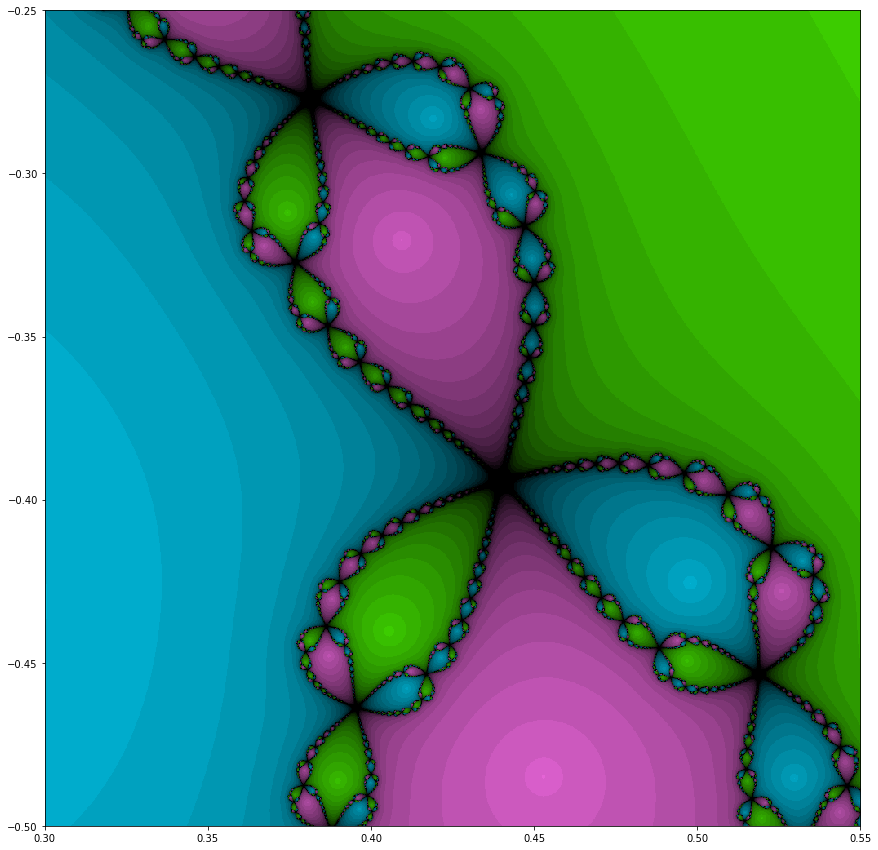

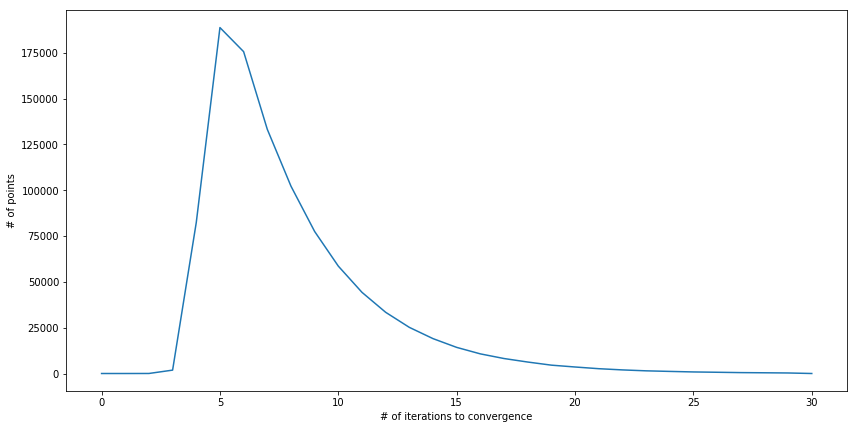

In [9]:
#changing colors
cc=[[0.298,1,0],[0,0.847,1],[1,0.437,0.933]]
xmin = 0.3
xmax = 0.55
ymin = -0.5
ymax = -0.25
eps = .0001
maxit = 30
imgx = 700
imgy = 700
img = np.zeros((imgy,imgx,3))
a = (xmax-xmin)/imgx
b = (ymax-ymin)/imgy
h = np.zeros(maxit+1)
sit=20
f = 1./sit
for i in range(imgy):
    for j in range(imgx):
        x=xmin+a*j
        y=ymax-b*i
        z0=complex(x,y)
        for k in range(maxit):
            if abs(z0)<eps:
                h[maxit]+=1
                break
            z=phi(z0)
            con=False
            for l in range(len(zz)):
                if abs(z-zz[l])<eps:
                    con=True
                    break
            if(con):
                #EDIT: To only have values in [0,1], we use numpy's clip function. (inspired by Samuel Hatin)
                img[i,j]=np.clip([(sit-k)*f*c for c in cc[l]], 0, 1)
                h[k]+=1
                break
            z0=z
        if k==maxit: h[maxit]+=1
plt.figure(figsize=(15,15))
plt.imshow(img,extent=[xmin,xmax,ymin,ymax])
plt.show()
scipy.misc.imsave('newt.png', img)
plt.figure(figsize=(14,7))
plt.plot(range(maxit+1),h)
plt.xlabel('# of iterations to convergence')
plt.ylabel('# of points')
plt.show()

# Problem 3. 
The following piece of code defines the iteration map of the Newton-Raphson method for the equation $z^4+z^2-1=0$.

$$\phi(z)=z-\frac{z^4+z^2-1}{4z^3+2z}$$

In [18]:
#Newton-Raphson iteration for z**4+z**2-1=0
def phi(z):
    z=complex(z)
    return z-((z*z*z*z+z*z-1)/(4*z*z*z+2*z))
#cubic roots of 1
zz=[np.sqrt(0.5*(np.sqrt(5)-1)), -np.sqrt(0.5*(np.sqrt(5)-1)),complex(0,np.sqrt(0.5*(np.sqrt(5)-1))),complex(0,-np.sqrt(0.5*(np.sqrt(5)-1)))]

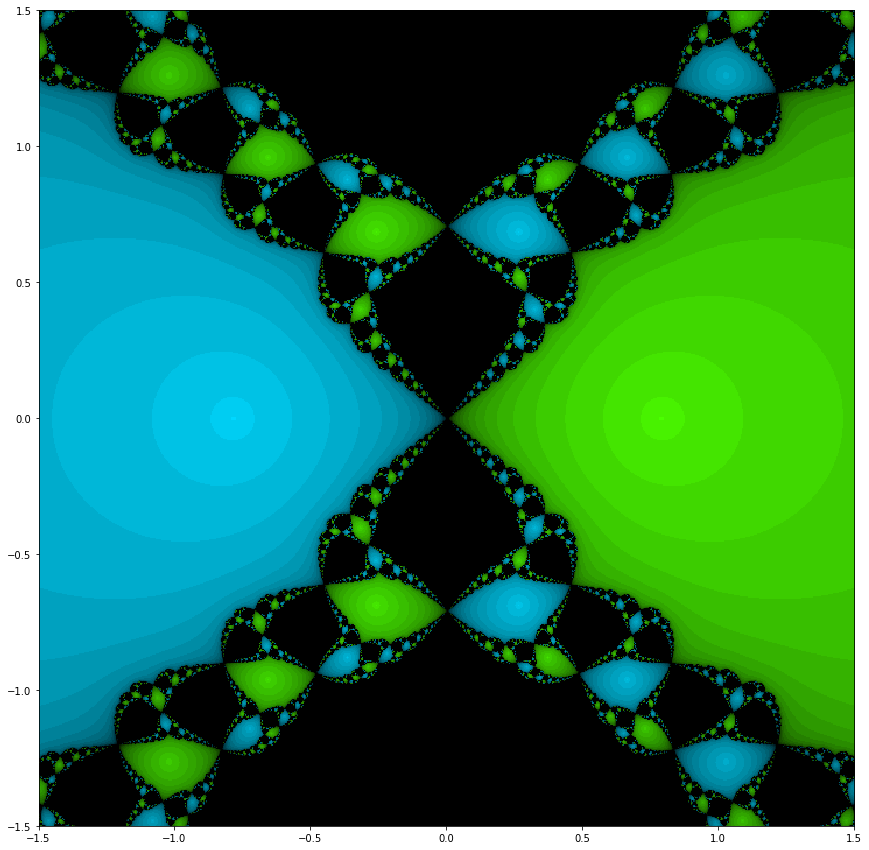

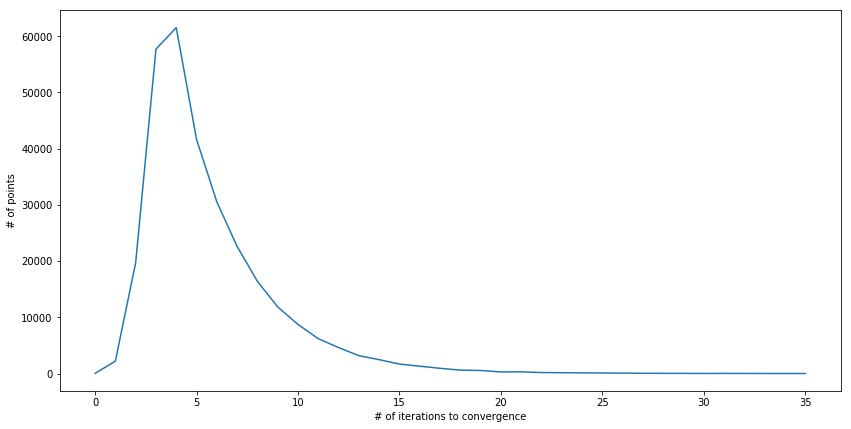

In [23]:
xmin = -1.5
xmax = 1.5
ymin = -1.5
ymax = 1.5
eps = .0001
maxit = 35
imgx = 700
imgy = 700
img = np.zeros((imgy,imgx,3))
a = (xmax-xmin)/imgx
b = (ymax-ymin)/imgy
h = np.zeros(maxit+1)
sit=20
f = 1./sit
for i in range(imgy):
    for j in range(imgx):
        x=xmin+a*j
        y=ymax-b*i
        z0=complex(x,y)
        for k in range(maxit):
            if abs(z0)<eps:
                h[maxit]+=1
                break
            z=phi(z0)
            con=False
            for l in range(len(zz)):
                if abs(z-zz[l])<eps:
                    con=True
                    break
            if(con):
                #EDIT: To only have values in [0,1], we use numpy's clip function. (inspired by Samuel Hatin)
                img[i,j]=np.clip([(sit-k)*f*c for c in cc[l]], 0, 1)
                h[k]+=1
                break
            z0=z
        if k==maxit: h[maxit]+=1
plt.figure(figsize=(15,15))
plt.imshow(img,extent=[xmin,xmax,ymin,ymax])
plt.show()
scipy.misc.imsave('newt.png', img)
plt.figure(figsize=(14,7))
plt.plot(range(maxit+1),h)
plt.xlabel('# of iterations to convergence')
plt.ylabel('# of points')
plt.show()

# Problem 4. Steffensen's iteration
We compute the following in the function below
$$\phi(z) = z - \frac{\omega f(z)^2}{f(z+\omega f(z))-f(z)}$$

In [24]:
def sphi(z, w):
    z=complex(z)
    f=z**3-1
    return z-((w*(f**2))/((z+w*f)**3-z**3))
#cubic roots of 1
zz=[1,complex(-.5,.5*np.sqrt(3)),complex(-.5,-.5*np.sqrt(3))]

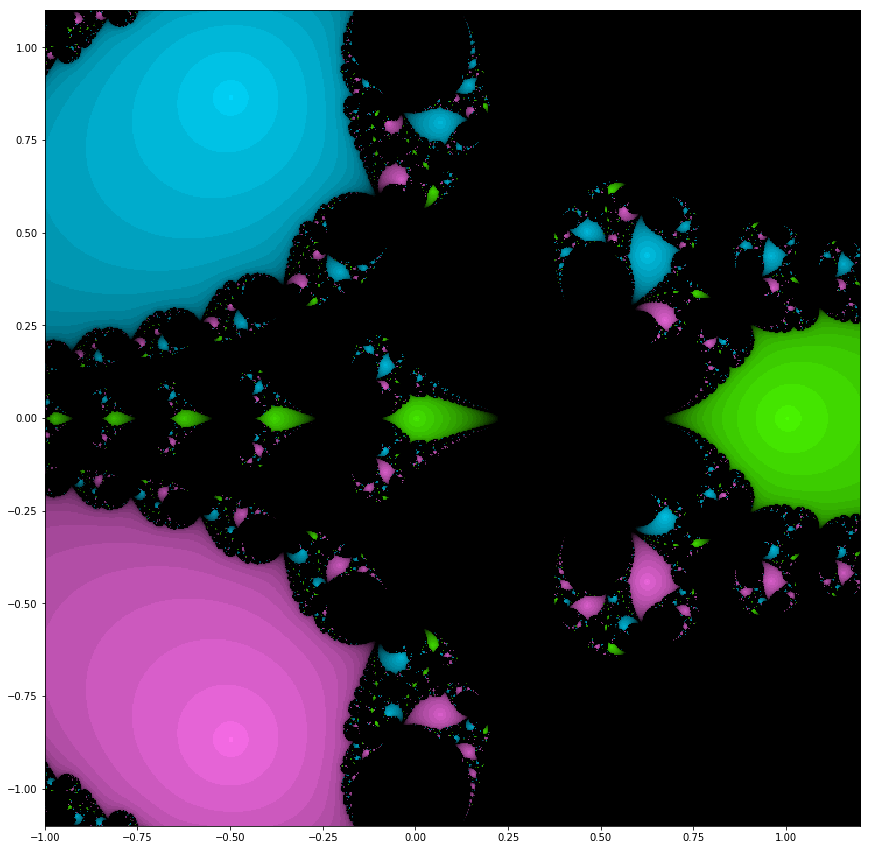

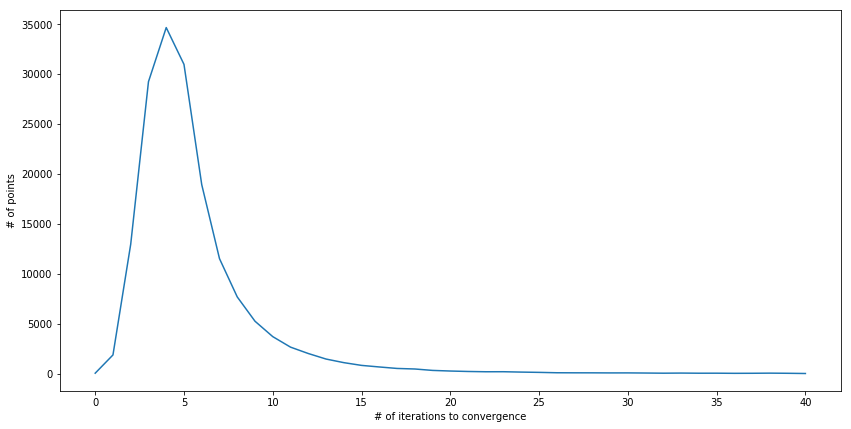

In [25]:
#Start with omega=1
w=1
xmin = -1.
xmax = 1.2
ymin = -1.1
ymax = 1.1
eps = .0001
maxit = 40
imgx = 700
imgy = 700
img = np.zeros((imgy,imgx,3))
a = (xmax-xmin)/imgx
b = (ymax-ymin)/imgy
h = np.zeros(maxit+1)
sit=20
f = 1./sit
for i in range(imgy):
    for j in range(imgx):
        x=xmin+a*j
        y=ymax-b*i
        z0=complex(x,y)
        for k in range(maxit):
            if abs(z0)<eps:
                h[maxit]+=1
                break
            z=sphi(z0, w)
            con=False
            for l in range(len(zz)):
                if abs(z-zz[l])<eps:
                    con=True
                    break
            if(con):
                #EDIT: To only have values in [0,1], we use numpy's clip function. (inspired by Samuel Hatin)
                img[i,j]=np.clip([(sit-k)*f*c for c in cc[l]], 0, 1)
                h[k]+=1
                break
            z0=z
        if k==maxit: h[maxit]+=1
plt.figure(figsize=(15,15))
plt.imshow(img,extent=[xmin,xmax,ymin,ymax])
plt.show()
scipy.misc.imsave('newt.png', img)
plt.figure(figsize=(14,7))
plt.plot(range(maxit+1),h)
plt.xlabel('# of iterations to convergence')
plt.ylabel('# of points')
plt.show()

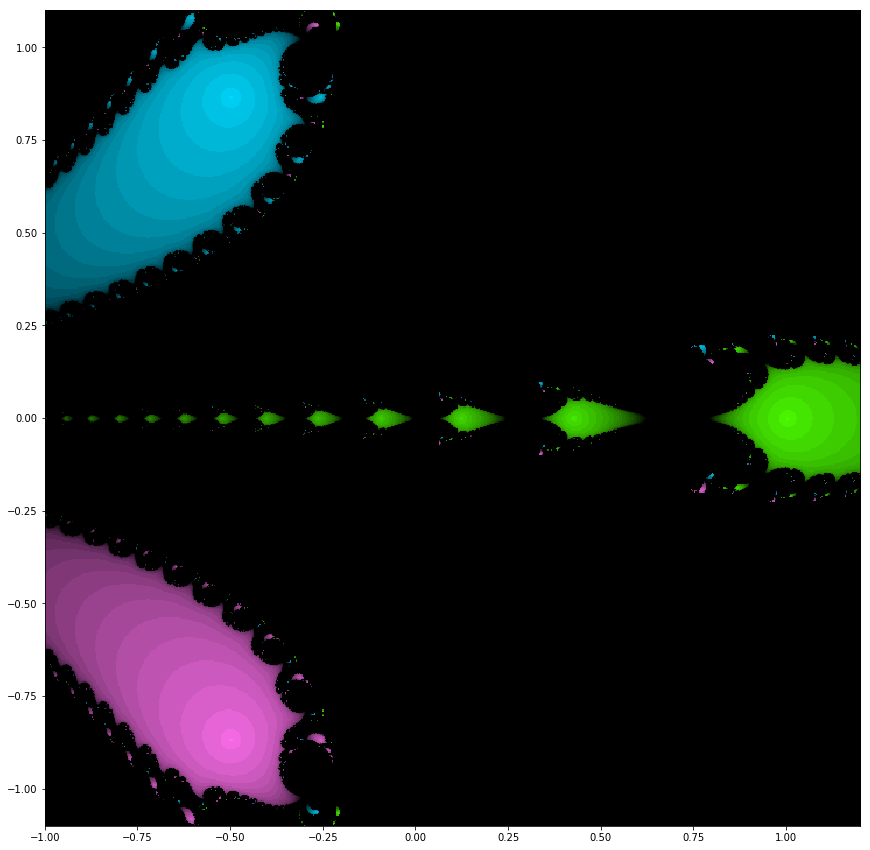

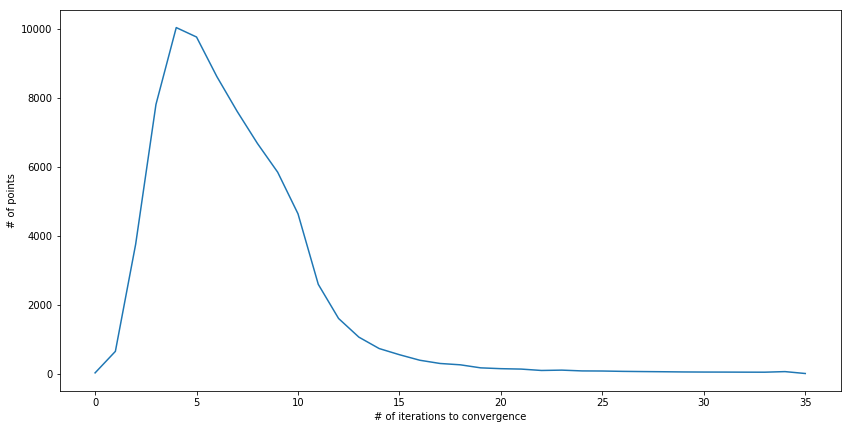

In [26]:
#Now omega=2
w=2
xmin = -1.
xmax = 1.2
ymin = -1.1
ymax = 1.1
eps = .0001
maxit = 35
imgx = 700
imgy = 700
img = np.zeros((imgy,imgx,3))
a = (xmax-xmin)/imgx
b = (ymax-ymin)/imgy
h = np.zeros(maxit+1)
sit=20
f = 1./sit
for i in range(imgy):
    for j in range(imgx):
        x=xmin+a*j
        y=ymax-b*i
        z0=complex(x,y)
        for k in range(maxit):
            if abs(z0)<eps:
                h[maxit]+=1
                break
            z=sphi(z0, w)
            con=False
            for l in range(len(zz)):
                if abs(z-zz[l])<eps:
                    con=True
                    break
            if(con):
                #EDIT: To only have values in [0,1], we use numpy's clip function. (inspired by Samuel Hatin)
                img[i,j]=np.clip([(sit-k)*f*c for c in cc[l]], 0, 1)
                h[k]+=1
                break
            z0=z
        if k==maxit: h[maxit]+=1
plt.figure(figsize=(15,15))
plt.imshow(img,extent=[xmin,xmax,ymin,ymax])
plt.show()
scipy.misc.imsave('newt.png', img)
plt.figure(figsize=(14,7))
plt.plot(range(maxit+1),h)
plt.xlabel('# of iterations to convergence')
plt.ylabel('# of points')
plt.show()

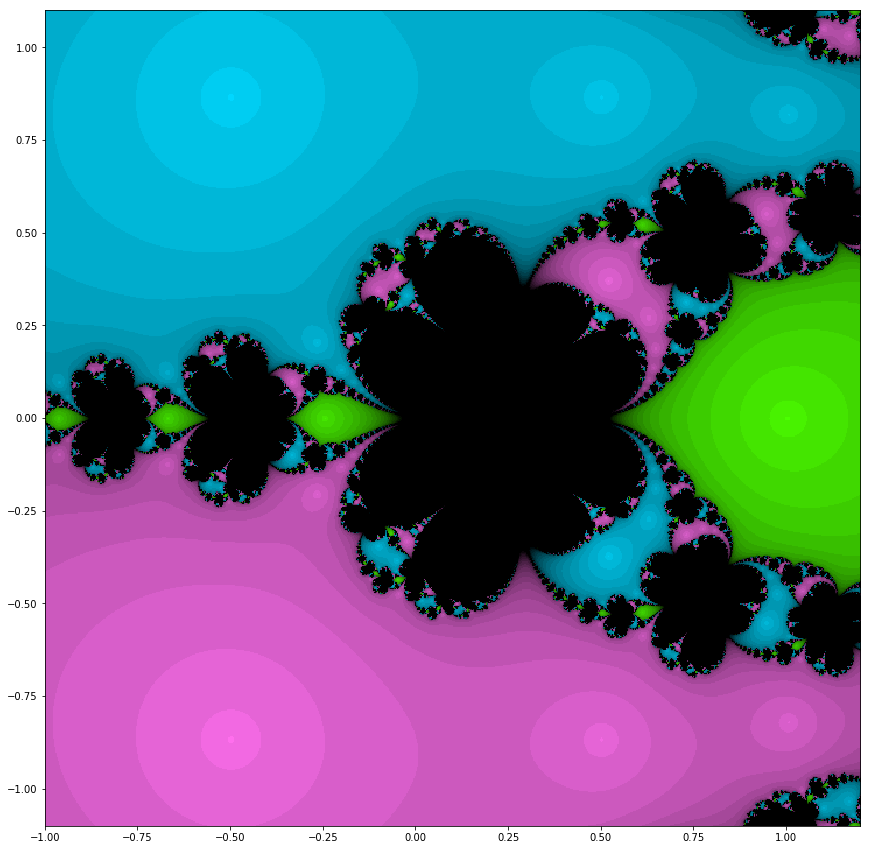

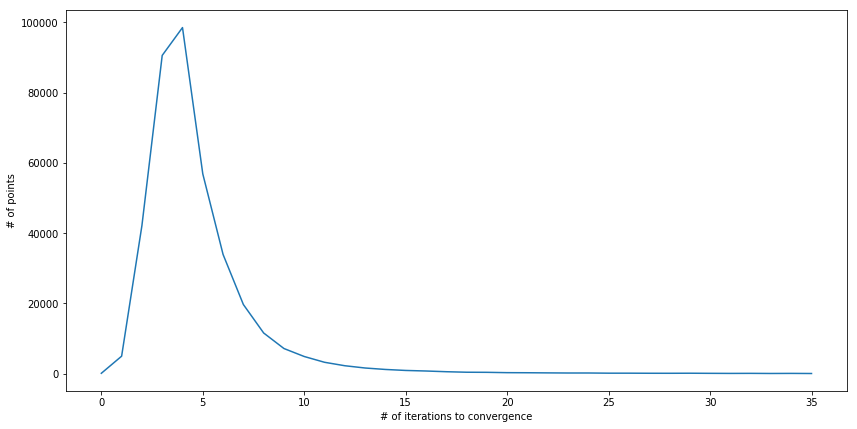

In [28]:
#Now omega=0.5
w=0.5
xmin = -1.
xmax = 1.2
ymin = -1.1
ymax = 1.1
eps = .0001
maxit = 35
imgx = 700
imgy = 700
img = np.zeros((imgy,imgx,3))
a = (xmax-xmin)/imgx
b = (ymax-ymin)/imgy
h = np.zeros(maxit+1)
sit=20
f = 1./sit
for i in range(imgy):
    for j in range(imgx):
        x=xmin+a*j
        y=ymax-b*i
        z0=complex(x,y)
        for k in range(maxit):
            if abs(z0)<eps:
                h[maxit]+=1
                break
            z=sphi(z0, w)
            con=False
            for l in range(len(zz)):
                if abs(z-zz[l])<eps:
                    con=True
                    break
            if(con):
                #EDIT: To only have values in [0,1], we use numpy's clip function. (inspired by Samuel Hatin)
                img[i,j]=np.clip([(sit-k)*f*c for c in cc[l]], 0, 1)
                h[k]+=1
                break
            z0=z
        if k==maxit: h[maxit]+=1
plt.figure(figsize=(15,15))
plt.imshow(img,extent=[xmin,xmax,ymin,ymax])
plt.show()
scipy.misc.imsave('newt.png', img)
plt.figure(figsize=(14,7))
plt.plot(range(maxit+1),h)
plt.xlabel('# of iterations to convergence')
plt.ylabel('# of points')
plt.show()

We deduce from the above graphs that $\omega$ determines how many points converge after a certain number of iteration. The bigger the $\omega$, the fewer the values that converge after a fixed number of iterations, as we see more black areas with bigger $\omega$. This is true especially for points far from roots. Points somewhat close to roots still converge.

# Problem 5. Steffensen's iteration derivative
We compute the derivative of $\phi$ to show quadratic convergence. We consider the real derivative. WLOG, assume $\omega = 1$. Hence, consider it as a function of $x\in\mathbb{R}$, and let $a$ be a solution. Now, consider the Taylor expansion of $\phi$, by MVT $\exists \alpha$ s.t.
$$
\phi(x) = \phi(a)+(x-a)\phi'(a)+\frac{1}2\phi''(\alpha)(x-a)^2
$$


$$
\lim_{x \to a} \phi(x)=\lim_{x \to a}\bigg(x-\frac{ f(x)^2}{f(x+ f(x))-f(x)}\bigg)
$$
We have, 
$$
\lim_{x \to a} \bigg(\frac{ f(x)}{f(x+ f(x))-f(x)} = \frac{1}{f'(a)}\bigg)
$$

assuming $f'(a) \neq 0$. Note that $\lim_{x \to a}\phi(x)=a$. Thus, 
$$
\implies \phi'(a) = \lim_{x \to a}\bigg(\frac{x-a-\frac{ f(x)^2}{f(x+ f(x))-f(x)}}{x-aa}\bigg)
$$

$$
\implies \lim_{x \to a}\bigg(1-\frac{\frac{ f(x)^2}{f(x+ f(x))-f(x)}}{x-a}\bigg) = \bigg(\lim_{x \to a} 1-\frac{f(x)-f(a)}{x-a}\frac{ f(x)}{f(x+ f(x))-f(x)}\bigg)
$$


Which goes to zero, but then  $\mid \phi(x)-\phi(a) \mid \leq M\mid x - a \mid ^2 $, for some $M$,  i.e. Steffensen's iteration is quadratically convergent. We know $f(a) = 0$, thus we conclude that the alrogithm is qudratically convergent. In contrast to NR, the computation of the derivative is not require, which can in certain situations be advantageous.